# D209: Data Mining, Task 1
Western Governors University
<br>Bailey Psuik 
<br>January 2024

### Part I: Research Question

**A1. Proposal of question**
<br>For this paper, data from a popular telecommunications company was analyzed. The company has collected data on its customers including demographic information, the services they receive, and customer account information in an effort to analyze their churn rate. Churn is defined as the percentage of customers who have discontinued service with the provider. Industry-wide, annual churn rates can be as high as 25%. The company knows that it is more cost-effective to retain existing customers than to acquire new ones, and therefore seeks to identify trends in customer data and uncover key metrics to help them predict their anticipated churn rate in hopes of mitigating it. 

This report will build a Naive Bayes classification model to answer the following question: **Can churn probability be predicted by a customer’s chosen services (i.e. enrolling in paperless billing, subscribing to TV streaming, etc.)?**

**A2. Defined goal**
<br>The goal of this report is two-fold: Build a Naive Bayes classification model to predict whether or not a customer will churn based on their chosen services, and make recommendations to the telecommuncations company based on findings.

### Part II: Method Justification

**B1. Explanation of classification method**

Naive Bayes is a classification technique based on Bayes' Theorem, which predicts conditional probabilities. At its most basic level, this theorem predicts the probability that A is true given that B is true. Naive Bayes is suitable for large data sets such as the one that will be used in this analysis. It is a supervised learning algorithm, meaning it makes use of labeled outcomes for data. A common application of this algorithm, for example, is spam email filtering, where emails are labeled either “spam” or “not spam”, depending on certain conditions being true. 

In this report, a Bernoulli Naive Bayes model will be created. This type of model takes inputs of boolean predictor variables classified as 1s and 0s (Ray, 2023). Here, the target variable being considered is “Churn”, a binary categorical variable consisting of the labels “Yes” and “No”. These values will be re-encoded as numerical variables, for purpose of analysis, with 1 corresponding to “Yes”, and 0 corresponding to “No”.

As stated, Naive Bayes is based on Bayes' Theorem, which calculates the probability of A being true given that B is true, using the following equation (Gill, 2023): **P(A|B) = (P(B|A) x P(A)) / P(B)**

Where:
* P(B|A) is the probability of B being true given that A is true
* P(A) is the probability of A being true
* P(B) is the probability of B being true
* A and B are events

For purposes of example here: 
* A is Churn
* B is StreamingTV

So the equation becomes: **P(Churn|StreamingTV) = (P(StreamingTV|Churn) x P(Churn)) / P(StreamingTV)**

This equation calculates the probability that a customer churns *given* that the customer subscribes to TV Streaming services. This is accomplished by multiplying the probability that a customer is subscribed to TV Streaming *given* that they churned, by the probability of all customers churning, and dividing the product by the probability that any given customer is subscribed to TV streaming services. 

The example above shows the calculation based on one predictor variable. However, the model created later in this report will make use of multiple predictor variables. For sake of example, the equation with three predictor variables looks like: 

**P(Churn|StreamingTV ∩ StreamingMovies ∩ PaperlessBilling ∩ …) = 
(P(StreamingTV ∩ StreamingMovies ∩ PaperlessBilling ∩ … |Churn)) x P(Churn) / P(StreamingTV ∩ StreamingMovies ∩ PaperlessBilling ∩ …)**

This equation calculates the probability that a customer will churn *given* that they subscribe to TV streaming, *and* movie streaming, *and* and are enrolled in paperless billing. A further-expanded version of this equation will be used to build a classification algorithm which will be trained by inputting labeled data, and then tested on an unseen, unlabeled training data set. The accuracy of the testing model will then be computed to inform the conclusion and recommendations for the company.

**B2. Summary of method assumption**

A core assumption of Naive Bayes is that it assumes total independence among predictor variables, meaning it assumes the presence or absence of any particular feature is unrelated to any of the other features (Ray, 2023). This assumption of conditional independence is what makes the model "naive" (Gill, 2023).

**B3. Packages list** 

* **Pandas**: used for data importing/exporting and dataframe creation
* **Numpy**: used for working with arrays and matrices
* **Matplotlib** and **Seaborn**: both used to create visualizations
* Various functions from **scikit-learn (sklearn)**: 
    * **sklearn.preprocessing**
        * **LabelEncoder**: used in re-expressing categorical values to numeric values
    * **sklearn.model_selection**
        * **train_test_split**: used to split the data set into a training set and testing set
    * **sklearn.naive_bayes**
        * **BernoulliNB**: used for fitting the model
    * **sklearn.metrics**
        * **confusion_matrix**: used to create a confusion matrix for the model
        * **roc_curve**: used to create the ROC curve for the model
        * **roc_auc_score**: used to calculate AUC score of the model

### Part III: Data Preparation

**C1. Data pre-processing**
<br>In order for this data set to be prepared for model building, the data must be pre-processed to get it into proper format for analysis. A crucial step in data pre-processing for creation of this particular Bernoulli Naive Bayes model is re-expressing each categorical predictor variable's values as numeric ones. The main goal here is to re-express the values for the predictor variables, which were originally encoded with string values of "Yes" and "No", as numeric values with all "Yes" values as 1s, and all "No" values as 0s. 

**C2. Data set variables** 
<br>The model being created in this report will predict churn rates for the company's customers, thus "Churn" is the dependent, or target, variable here. The predictor variables that will be included in this model cover information on customers' chosen services. Each of the variables listen below are binary categorical variables. 

Target variable:
* Churn

Predictor variables: 
* PortModem
* Tablet
* Phone
* Multiple
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* PaperlessBilling 

Each of these variables is categorical, containing values of "Yes" and "No". These categorical variables will be re-expressed as numeric variables in the code found in section C3 below. 

**C3. Steps for analysis**
<br>Before moving forward with the building of the model, the data set must be cleaned. Skipping this vital step could result in a faulty or misleading answer to the research question posed in section A1. Goals of the data cleaning process include: 
* Perform an initial inspection of the data to get the number of rows, columns, and data types
* Identify and treat duplicate values
* Convert categorical variables to numerical variables
* Identify and treat missing values
* Identify and treat outliers

The steps used to clean the data are as follows: 
<br><br>Step 1: Perform an initial inspection of the data with the .info() function. 
* Outcome: The data contains 10,000 rows and 50 columns. All variables but one, InternetService, have 10,000 non-null values. Data types of each variable are logical.

<br>Step 2: Compute a sum of the number of total duplicates contained in the data set. Additionally, since 'Customer_id' is denoted as being a unique identifier, compute the sum of duplicates in this column.
* Outcome: No duplicates were found, so no treatment was needed.

<br>Step 3: Re-express ordinal categorical variables as numerical variables.
* Outcome: 14 ordinal categorical variables had their values replaced with numerical values to prepare this data set for analysis.

<br>Step 4: Re-encode nominal categorical variables with label encoding.
* Outcome: Values for Gender and InternetService, each of which have three unique values, are nominally encoded.

<br>Step 5: Treat the missing values in ‘InternetService’ detected from the initial inspection of the data.
* Outcome: The 2,129 null values found in this column were filled in using imputation of the mode, as ‘InternetService’ is a categorical variable.

<br>Step 6: Visually inspect the box plots for each quantitative variable to identify outliers. 
* Outcome: Outliers were detected in nine quantitative variables, but these values were deemed acceptable for various reasons, and were therefore retained.

<br>Complete code for the data cleaning portion of this analysis is below.

In [129]:
# Initial package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# .csv import
churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D209/churn_clean.csv")

# Step 1: Profile the data for initial inspection
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [130]:
# Step 2: Identify and treat duplicate values

# Return duplicate values as True, non-duplicates as False
print(churn_data.duplicated())

# Get total counts of duplicate values
print(churn_data.duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool
False    10000
Name: count, dtype: int64


In [131]:
# True = duplicate, False = non-duplicate
# 10,000 False values ==> No complete duplicates exist 

# Check for duplicate values in Customer_id column, since this is denoted as a unique identifier
print(churn_data['Customer_id'].duplicated())
print(churn_data['Customer_id'].duplicated().value_counts())

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Customer_id, Length: 10000, dtype: bool
Customer_id
False    10000
Name: count, dtype: int64


In [132]:
# Step 3: Re-express ordinal categorical variables as numerical variables 

# Get unique values for each ordinal categorical variable
## Items 1-8 have ordinal values, but are already numerically encoded, so they will not be included
print("TimeZone:",churn_data.TimeZone.unique())
print("Churn:",churn_data.Churn.unique())
print("Techie:",churn_data.Techie.unique())
print("Port_modem:",churn_data.Port_modem.unique())
print("Tablet:",churn_data.Tablet.unique())
print("Phone:",churn_data.Phone.unique())
print("Multiple:",churn_data.Multiple.unique())
print("OnlineSecurity:",churn_data.OnlineSecurity.unique())
print("OnlineBackup:",churn_data.OnlineBackup.unique())
print("DeviceProtection:",churn_data.DeviceProtection.unique())
print("TechSupport:",churn_data.TechSupport.unique())
print("StreamingTV:",churn_data.StreamingTV.unique())
print("StreamingMovies:",churn_data.StreamingMovies.unique())
print("PaperlessBilling:",churn_data.PaperlessBilling.unique())

TimeZone: ['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']
Churn: ['No' 'Yes']
Techie: ['No' 'Yes']
Port_modem: ['Yes' 'No']
Tablet: ['Yes' 'No']
Phone: ['Yes' 'No']
Multiple: ['No' 'Yes']
OnlineSecurity: ['Yes' 'No']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['Yes' 'No']
PaperlessBilling: ['Yes' 'No']


In [133]:
# Replicate the variables to prepare for replacing categorical values with numeric ones
churn_data['TimeZone_num']=churn_data['TimeZone']
churn_data['Churn_num']=churn_data['Churn']
churn_data['Techie_num']=churn_data['Techie']
churn_data['Port_modem_num']=churn_data['Port_modem']
churn_data['Tablet_num']=churn_data['Tablet']
churn_data['Phone_num']=churn_data['Phone']
churn_data['Multiple_num']=churn_data['Multiple']
churn_data['OnlineSecurity_num']=churn_data['OnlineSecurity']
churn_data['OnlineBackup_num']=churn_data['OnlineBackup']
churn_data['DeviceProtection_num']=churn_data['DeviceProtection']
churn_data['TechSupport_num']=churn_data['TechSupport']
churn_data['StreamingTV_num']=churn_data['StreamingTV']
churn_data['StreamingMovies_num']=churn_data['StreamingMovies']
churn_data['PaperlessBilling_num']=churn_data['PaperlessBilling']

In [134]:
# Create dictionaries for conversion. 
## *TimeZones are ranked ordinally based on a 1 hour difference relative to Puerto Rico

dict_TimeZone = {"America/Puerto_Rico": 1, 
                 "America/Detroit": 2,
                 "America/New_York": 2,
                 "America/Indiana/Indianapolis": 2, 
                 "America/Kentucky/Louisville": 2, 
                 "America/Indiana/Petersburg": 2, 
                 "America/Toronto": 2, 
                 "America/Indiana/Winamac": 2,
                 "America/Indiana/Vincennes": 2, 
                 "America/Indiana/Marengo": 2,
                 "America/Chicago": 3,
                 "America/Menominee": 3,
                 "America/Indiana/Knox": 3,
                 "America/North_Dakota/New_Salem": 3,
                 "America/Indiana/Tell_City": 3,
                 "America/Denver": 4,
                 "America/Phoenix": 4,
                 "America/Boise": 4,
                 "America/Ojinaga": 4,
                 "America/Los_Angeles": 5,
                 "America/Sitka": 6,
                 "America/Nome": 6,
                 "America/Anchorage": 6,
                 "America/Juneau": 6,
                 "Pacific/Honolulu": 7}
dict_Churn = {"No":0, "Yes":1}
dict_Techie = {"No":0, "Yes":1}
dict_Port_modem = {"No":0, "Yes":1}
dict_Tablet = {"No":0, "Yes":1}
dict_Phone = {"No":0, "Yes":1}
dict_Multiple = {"No":0, "Yes":1}
dict_OnlineSecurity = {"No":0, "Yes":1}
dict_OnlineBackup = {"No":0, "Yes":1}
dict_DeviceProtection = {"No":0, "Yes":1}
dict_TechSupport = {"No":0, "Yes":1}
dict_StreamingTV = {"No":0, "Yes":1}
dict_StreamingMovies = {"No":0, "Yes":1}
dict_PaperlessBilling = {"No":0, "Yes":1}

In [135]:
# Replace values from dictionaries
churn_data['TimeZone_num'].replace(dict_TimeZone, inplace=True)
churn_data['Churn_num'].replace(dict_Churn, inplace=True)
churn_data['Techie_num'].replace(dict_Techie, inplace=True)
churn_data['Port_modem_num'].replace(dict_Port_modem, inplace=True)
churn_data['Tablet_num'].replace(dict_Tablet, inplace=True)
churn_data['Phone_num'].replace(dict_Phone, inplace=True)
churn_data['Multiple_num'].replace(dict_Multiple, inplace=True)
churn_data['OnlineSecurity_num'].replace(dict_OnlineSecurity, inplace=True)
churn_data['OnlineBackup_num'].replace(dict_OnlineBackup, inplace=True)
churn_data['DeviceProtection_num'].replace(dict_DeviceProtection, inplace=True)
churn_data['TechSupport_num'].replace(dict_TechSupport, inplace=True)
churn_data['StreamingTV_num'].replace(dict_StreamingTV, inplace=True)
churn_data['StreamingMovies_num'].replace(dict_StreamingMovies, inplace=True)
churn_data['PaperlessBilling_num'].replace(dict_PaperlessBilling, inplace=True)

In [152]:
# Step 4: Re-encode nominal categorical variables with label encoding.
from sklearn.preprocessing import LabelEncoder

# Fit the label encoder to categorical data for Gender and Internet Service
label_encoder_gender = LabelEncoder()
churn_data['Gender_num'] = label_encoder_gender.fit_transform(churn_data['Gender'])
churn_data['Gender_decoded'] = label_encoder_gender.inverse_transform(churn_data['Gender_num'])

label_encoder_internet = LabelEncoder()
churn_data['InternetService_num'] = label_encoder_gender.fit_transform(churn_data['InternetService'])
churn_data['InternetService_decoded'] = label_encoder_gender.inverse_transform(churn_data['InternetService_num'])

label_encoder_internet = LabelEncoder()
churn_data['Contract_num'] = label_encoder_gender.fit_transform(churn_data['Contract'])
churn_data['Contract_decoded'] = label_encoder_gender.inverse_transform(churn_data['Contract_num'])

label_encoder_state = LabelEncoder()
churn_data['State_num'] = label_encoder_gender.fit_transform(churn_data['State'])
churn_data['State_decoded'] = label_encoder_gender.inverse_transform(churn_data['State_num'])

label_encoder_area = LabelEncoder()
churn_data['Area_num'] = label_encoder_gender.fit_transform(churn_data['Area'])
churn_data['Area_decoded'] = label_encoder_gender.inverse_transform(churn_data['Area_num'])

label_encoder_marital = LabelEncoder()
churn_data['Marital_num'] = label_encoder_gender.fit_transform(churn_data['Marital'])
churn_data['Marital_decoded'] = label_encoder_gender.inverse_transform(churn_data['Marital_num'])

label_encoder_paymentmethod = LabelEncoder()
churn_data['PaymentMethod_num'] = label_encoder_gender.fit_transform(churn_data['PaymentMethod'])
churn_data['PaymentMethod_decoded'] = label_encoder_gender.inverse_transform(churn_data['PaymentMethod_num'])

In [137]:
# Step 5: Identify and treat missing values 

# Initial inspection of the data shows that only 7,871 out of 10,000 values for InternetService are non-null values
# This means there are 2,129 missing values in this column that must be imputed

# Imputation will be completed using the mode of 'InternetService', a nominal categorical variable
mode_InternetService = churn_data['InternetService'].mode()[0]

# Fill all null values in InternetService with the mode
churn_data['InternetService'] = churn_data['InternetService'].fillna(mode_InternetService)

# Confirm all missing values have been filled by returning the sum of null values in InternetService & InternetService_num
print(churn_data['InternetService'].isnull().sum())
print(churn_data['InternetService_num'].isnull().sum())

0
0


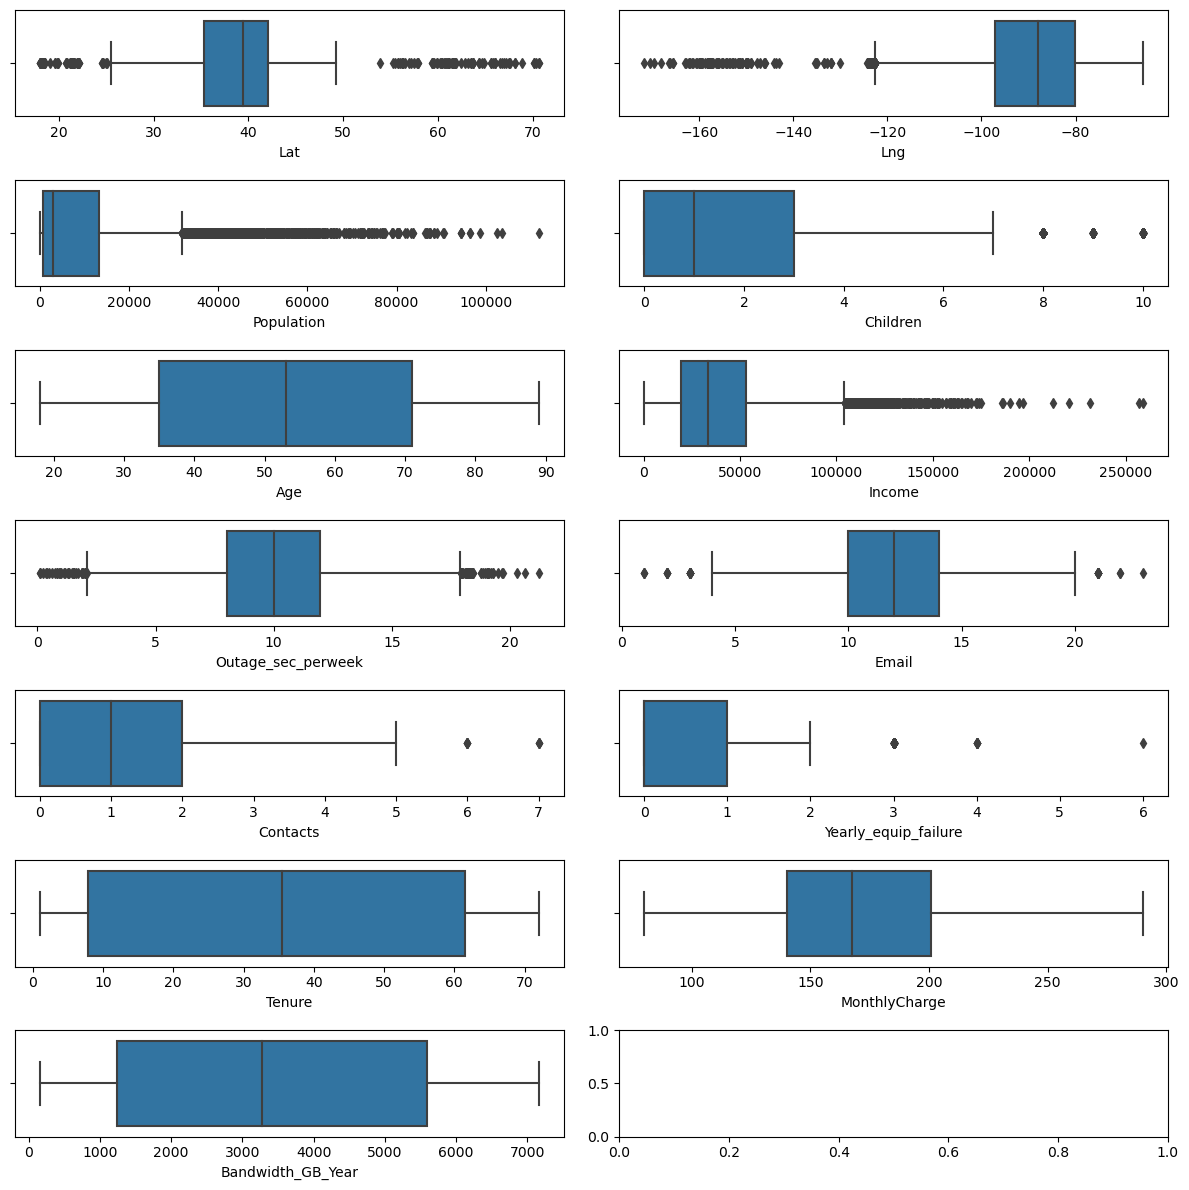

In [138]:
# Step 6: Identify and treat outliers

# Visually show outliers for each quantitative variable on respective box plots
# Import seaborn
import seaborn as sns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 12))

plt.subplot(7, 2, 1)
sns.boxplot(x='Lat', data = churn_data)

plt.subplot(7, 2, 2)
sns.boxplot(x='Lng', data = churn_data)

plt.subplot(7, 2, 3)
sns.boxplot(x='Population', data = churn_data)

plt.subplot(7, 2, 4)
sns.boxplot(x='Children', data = churn_data)

plt.subplot(7, 2, 5)
sns.boxplot(x='Age', data = churn_data)

plt.subplot(7, 2, 6)
sns.boxplot(x='Income', data = churn_data)

plt.subplot(7, 2, 7)
sns.boxplot(x='Outage_sec_perweek', data = churn_data)

plt.subplot(7, 2, 8)
sns.boxplot(x='Email', data = churn_data)

plt.subplot(7, 2, 9)
sns.boxplot(x='Contacts', data = churn_data)

plt.subplot(7, 2, 10)
sns.boxplot(x='Yearly_equip_failure', data = churn_data)

plt.subplot(7, 2, 11)
sns.boxplot(x='Tenure', data = churn_data)

plt.subplot(7, 2, 12)
sns.boxplot(x='MonthlyCharge', data = churn_data)

plt.subplot(7, 2, 13)
sns.boxplot(x='Bandwidth_GB_Year', data = churn_data)

plt.tight_layout()

After evaluation of each count and range of outliers for the variables, it was determined that none of the outliers should be removed, as each outlier is within an acceptable or justifiable range, implying that their input is valid and was not cause of mistake or human error. Below is the justification for retention of the data set’s outliers: 
* Lat & Lng: Customers are from all over the country, so these values may be accurate as customers are more densely populated in some areas. There are no latitudes or longitudes off on their own in the boxplot so there is no cause to question these values.
* Population: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Children: Customers are from all over the country, so 100,000 is a very reasonable population number when many cities in the US have over 1,000,000 residents.
* Income: The maximum value is just over $250k, which is a reasonable income amount.
* Outage_sec_perweek: There are many outliers here which makes sense—there are likely some customers who experience little to no outages in the average week, making up the lower range of outliers. On the other hand, if one customer is experiencing an outage, those in a certain radius of them would likely also experience an outage, explaining the high number of upper-range outliers here too. This explains the wide range of outlier values here too.
* Email: The upper and lower range of outliers here does not present anything out of the question. 
* Contacts: The upper and lower range of outliers here does not present anything out of the question. 
* Yearly_equip_failure: The maximum number of times someone’s equipment failed this year is 6, which is unfortunate, but possible.

**C4. Cleaned data set**
<br>The prepared data set is downloadable via the code below.

In [139]:
churn_data.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/churn_clean_D209p1.csv")

### Part IV: Analysis

**D1. Splitting the data**
<br> Before the data is split, a new data frame containing only the predictor variables relevant to this model is created. 

In [140]:
# Create new dataframe including only Churn and each numerically encoded service variable
df = churn_data[['Churn_num', 'Techie_num', 'Port_modem_num', 'Tablet_num', 'Phone_num', 'Multiple_num',
                'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num',
                'StreamingTV_num', 'StreamingMovies_num', 'PaperlessBilling_num']].copy()
df.head()

,Churn_num,Techie_num,Port_modem_num,Tablet_num,Phone_num,Multiple_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num
0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,1,0,1,1,1,1,0,0,0,1,1,1
2,0,1,1,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0


In [141]:
# X and y are defined from this newly created reduced dataframe, df: 
X = df[['Techie_num', 'Port_modem_num', 'Tablet_num', 'Phone_num', 'Multiple_num',
                'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num',
                'StreamingTV_num', 'StreamingMovies_num', 'PaperlessBilling_num']]
y = df[['Churn_num']]
y = y.values.ravel()

Before X and y are split, a check for multicollinearity among the predictor variables will be performed by using a correlation matrix (Shukla, 2023).

In [142]:
X.corr()

,Techie_num,Port_modem_num,Tablet_num,Phone_num,Multiple_num,OnlineSecurity_num,OnlineBackup_num,DeviceProtection_num,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num
Techie_num,1.000000,-0.014256,0.010992,-0.003081,-0.004661,-0.015300,0.004540,0.021346,0.007391,0.003436,-0.004298,0.001311
Port_modem_num,-0.014256,1.000000,0.000940,0.002072,-0.003014,0.003074,-0.002092,-0.004110,0.006304,-0.000272,0.005674,0.004327
Tablet_num,0.010992,0.000940,1.000000,0.024825,-0.019828,0.008849,-0.003400,-0.005657,-0.010658,0.018233,0.020710,0.018502
Phone_num,-0.003081,0.002072,0.024825,1.000000,0.003398,0.001177,-0.003172,-0.030339,-0.005060,-0.012464,-0.002588,-0.009228
Multiple_num,-0.004661,-0.003014,-0.019828,0.003398,1.000000,-0.002436,-0.002566,0.003207,-0.010360,0.003097,0.004691,-0.004657
OnlineSecurity_num,-0.015300,0.003074,0.008849,0.001177,-0.002436,1.000000,0.010338,0.012852,0.010774,0.001415,0.010575,-0.001019
OnlineBackup_num,0.004540,-0.002092,-0.003400,-0.003172,-0.002566,0.010338,1.000000,0.009991,-0.002802,-0.008043,0.001434,0.010034
DeviceProtection_num,0.021346,-0.004110,-0.005657,-0.030339,0.003207,0.012852,0.009991,1.000000,-0.004475,0.002878,0.019450,0.013166
TechSupport_num,0.007391,0.006304,-0.010658,-0.005060,-0.010360,0.010774,-0.002802,-0.004475,1.000000,-0.003047,-0.013533,0.000944
StreamingTV_num,0.003436,-0.000272,0.018233,-0.012464,0.003097,0.001415,-0.008043,0.002878,-0.003047,1.000000,-0.010516,-0.016353


Upon viewing the correlation matrix created above it can be concluded that none of the predictor variables have a high correlation score. Because of this, all variables will be retained for creation of the model.

In [143]:
# Splitting the data

# First: Import train_test_split from scikit-Learn
from sklearn.model_selection import train_test_split

#DC>ML w sklearn > Measuring model performance
# A standard 80/20 split will be used, placing 80% of data into the training set, and 20% into the test set
    # This is denoted by test_size=0.2, specifying this proportion
# The split will also be stratified-- it will distribute the labels in the train and test sets proportional to the original data
    # This is denoted by stratify=y
# The random_state kwarg sets a seed for the random number generator
    # Using this same seed later allows for this same split to be reproduced later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=125)

In [151]:
# The split files for download are obtained by executing the code below: 
X_train.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/X_train_D209p1.csv") 
X_test.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/X_test_D209p1.csv") 

y_train_df = pd.DataFrame(y_train, columns=["Churn_num"])
y_test_df = pd.DataFrame(y_train, columns=["Churn_num"])

y_train_df.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/y_train_D209p1.csv") 
y_test_df.to_csv(r"C:/Users/psuik/Desktop/WGU/D209/y_test_D209p1.csv") 

**D2. Output and intermediate calculations**
<br>The data has now been analyzed for multicollinearity among all predictor variables through use of a correlation matrix. Upon analyzing the values in the matrix, no variables are found to be highly correlated with one another. Because of this, all predictor variables have been retained in this step and will be included in the model. The code used to create this matrix is written in section D1 above.

**D3. Code execution**
<br> Now that X is defined with all predictor variables and y is defined using the target variable, and the predictor variables have been analyzed for multicollinearity, the Bernoulli Naive Bayes model will be built using the code below.

scikit-learn is used to build machine learning models implemented as Python classes (Bowne-Anderson, n.d.). These classes implement the appropriate algorithms for training a model (with a training set), and predicting labels for unseen data found in the test set.

In [154]:
# Build the model (Awan, 2023)

# Import Bernoulli Naive Bayes (BernoulliNB) from scikit-learn
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes classifier 
model = BernoulliNB()

# Fit the model (a.k.a. train the model) using the training data obtained from using the train_test_split() function previously
model.fit(X_train, y_train)

# Predict the values of unlabeled data using the test set as input
y_pred = model.predict(X_test)

# Print the actual y values from the test set and the predicted values based on inputting the test values for X
print("Actual value: ", y_test)
print("Predicted value: ", predicted)

Actual value:  [0 0 0 ... 0 1 1]
Predicted value:  [0 0 0 ... 0 1 1]


### Part V: Data Summary and Implications

**E1. Accuracy and AUC**
<br>The accuracy of the model is defined by the fraction of correct predictions it makes (Bowne-Anderson, n.d.). In other words, it is the number of correct predictions divided by the total number of data points. Seeing as though the purpose of building a model is to predict labels for unseen data, the accuracy score of this model will be calculated using the test data set previously created using the .score() function.

In [155]:
print("Test set accuracy: ", model.score(X_test, y_test))

Test set accuracy:  0.762


A test set accuracy of 0.762 indicates that the model makes correct predictions on 76.2% of unseen data. This is confirmed visually through creation of a confusion matrix, below.

In [156]:
# (Bowne-Anderson, n.d.)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1363  107]
 [ 369  161]]


The top left number in the matrix shows the number true positives (TP), which in this case is the number of customers the model correctly predicts will not churn (TP = 1,363).

The bottom right number shows the number of true negatives (TN), which is the number of customers the model correcly predicts *will* churn (TN = 161).

*TP + TN = x*
<br>1,363 + 161 = 1,524

*x / total observations = accuracy*
<br>1,524 / 2,000 = 0.762

This calculation returns 0.762, confirming the accuracy score calculated above.

Another measure of the model is found by calculating the area under the curve (AUC), where the curve is the receiver operator characteristic (ROC) curve. The ROC curve is calculated using the code below, with an explanation following it.

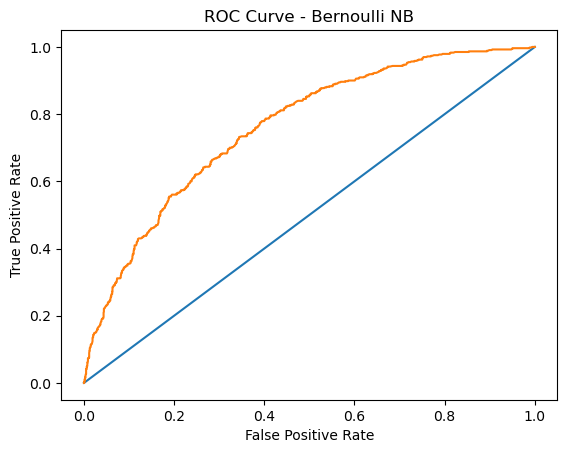

array([0.04298773, 0.19979382, 0.12000021, ..., 0.0438026 , 0.50082517,
       0.54016406])

In [157]:
# (Bowne-Anderson, n.d.)
from sklearn.metrics import roc_curve
y_pred = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bernoulli NB')
plt.show()

model.predict_proba(X_test)[:,1]

When the threshold is 0, the model outputs 1 for all data points, and the true positive (TP) rate is equal to the false positive (FP) rate, which is equal to 1 (TP = FP = 1). Alternatively, when threshold is set to 0, the model predicts 0 for all data points, and TP = FP = 0. These points are reflected by the blue line on the plot, representing the reference line for the ROC curve.

The ROC curve is represented in orange above. This curve represents the points obtained by testing all possible threshold values between 0 and 1 (Bowne-Anderson, n.d.). Although not realistic in practice, theoretically the best possible outcome of an ROC curve is for one of its points to reach a TP rate of 1.0, and a FP rate of 0.0 -- reaching the top left corner of the plot. The area under such a curve would be 1.0, the maximum AUC. This would indicate that the model's ability to distinguish between classes is perfect. An AUC value below 1.0 indicates that the model is prone to some errors when distinguising between classes. The closer the AUC value is to 1.0, the better the model's ability to distinguish between classes. To evaluate the AUC of the model created in this report, the code below is used.

In [158]:
# (Bowne-Anderson, n.d.)
from sklearn.metrics import roc_auc_score
# Instantiate classifier, split, fit, predict
y_pred_prob = model.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_pred_prob))

AUC: 0.7599582852008728


The AUC for this model rounds to 0.760. On a scale of 0 to 1, a score of 0.760 indicates that this model does decently well at classifying values of unseen data. This value can be compared to an AUC of 0.5, which would indicate that the classifier is not working (Bhandari, 2024). This curve is represented by the blue reference line on the plot. 

**E2. Results and implications**
<br>Both the resulting accuracy score and AUC value calculated for this Bernoulli Naive Bayes model (0.762 and 0.760, respectively) indicate that this model is a good predictor of churn when considering each of these values on a scale of 0 to 1, with 1 being a perfect model. Returning to the question posed in section A1 -- **Can churn probability be predicted by a customer’s chosen services (i.e. enrolling in paperless billing, subscribing to TV streaming, etc.)?** -- the resulting answer is **yes, churn probability can be predicted by a customer's chosen services.** 

Though the accuracy score and AUC values calculated here imply that the model is not perfect, it is practically impossible to create a perfect model in a real-world scenario such as this. On the other hand, both of these metrics can be compared to a baseline value of 0.5, a value that for either of these metrics would mean the model has a 50-50 chance of making a correct prediction. A value of 0.5 for either metric would mean that the model is no better than random chance, thus the model would be insufficient. Seeing as though the metrics calculated for this model are above this baseline, it can be concluded that this model is sufficient in predicting churn for the telecommunication company's customers.

**E3. Limitation**
<br>The limitation of this model directly relates to the main assumption made of Naive Bayes models-- the assumption that all predictor variables are completely independent of each other. In practice, it is nearly impossible for this to hold true. Although the correlation matrix created in section D1 of this report shows *low* correlation between all predictor variables, none of these values are *zero*. Since this violates the assumption of the model, results and implications of this model cannot be relied upon with 100% certainty.

**E4. Course of action**
<br>Based on the results of this analysis, it is recommended that the model created here be adopted by the telecommunications company in predicting churn rates based on customers' chosen services. While this model is adequate at predicting churn rates, there is, however, room for improvement should the company decide they would like to increase the accuracy of predictions made by this model. This could be accomplished by the inclusion of different predictor variables to achieve increased model performance. As it stands, though, the Naive Bayes model created here does effectively predict churn based on customers' chosen services.

### Part VI: Demonstration

**F. Panopto recording**
<br> A Panopto video demonstrating and explaining use of the code included here is included separately.

**G. Sources for third-party code**

Awan, A. A. (2023, March 1). Naive Bayes Classification Tutorial using Scikit-learn. DataCamp. Retrieved January 10, 2024, from https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | How good is your model? [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/fine-tuning-your-model?ex=1

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | Logistic regression and the ROC curve [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/fine-tuning-your-model?ex=3

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | Area under the ROC curve [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/fine-tuning-your-model?ex=7

**H. Sources**

Awan, A. A. (2023, March 1). Naive Bayes Classification Tutorial using Scikit-learn. DataCamp. Retrieved January 10, 2024, from https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

Bhandari, A. (2024, January 8). Guide to AUC ROC Curve in Machine Learning : What Is Specificity? Analytics Vidhya. Retrieved January 12, 2024, from https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

Gill, S. S. (2023, June 30). Bernoulli Naive Bayes. Coding Ninjas. Retrieved January 12, 2024, from https://www.codingninjas.com/studio/library/bernoulli-naive-bayes

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | The classification challenge [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/classification?ex=6

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | Measuring model performance [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/classification?ex=9

[Hugo Bowne-Anderson]. Machine Learning with scikit-learn | How good is your model? [Video]. DataCamp. https://campus.datacamp.com/courses/machine-learning-with-scikit-learn-archived/fine-tuning-your-model?ex=1

Ray, S. (2023, December 1). Naive Bayes Classifier Explained: Applications and Practice Problems of Naive Bayes Classifier. Analytics Vidhya. Retrieved January 11, 2024, from https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

Shukla, P. (2023, January 12). Naive Bayes Algorithms: A Complete Guide for Beginners. Analytics Vidhya. Retrieved January 11, 2024, from https://www.analyticsvidhya.com/blog/2023/01/naive-bayes-algorithms-a-complete-guide-for-beginners/